In [327]:
import numpy as np

In [328]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc

plt.rcParams['axes.linewidth'] = 2.
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=19)
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
plt.rcParams["figure.figsize"] = (7.5,6.5)

plt.rcParams.update({
        "text.usetex": True,
        "font.family": 'serif',
        "font.serif": ['Palatino'],})

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*.1,numticks=100)
rc('text', usetex=True)

colours =  ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00', '#377eb8', '#ff7f00', '#4daf4a', '#f781bf']

In [329]:
# ============================
# Constants
# ============================

GeVincm     = 5.068e13 # cm^-1 / GeV
GeVinsec    = 1.519e24 # s^-1 / GeV
KinGeV      = 8.62e-14 # GeV / K
GaussinGeV2 = 1.95e-20 # GeV^2 / G

rSun = 8.277 # kpc
sigmaT = 0.6652e-24 # cm^2
me = 5.11e-4 # GeV
alpha = 1/137
e = (4*np.pi*alpha)**.5  # elementary charge in natural units

In [330]:
def nBB(Eg, T): # GeV^-1 cm^-3
    return GeVincm**3 / np.pi**2 * Eg**2 / (np.exp(Eg/T)-1)

def nISRF(Eg, R, z, T, R0, z0, n0):
    nTOT = GeVincm**3 / np.pi**2 * T**4 * np.pi**4/15
    return n0/nTOT * nBB(Eg, T) * np.exp(-abs(z)/z0) * np.exp(-(R-rSun)/R0)

def nOpt(Eg, R, z):
    return nISRF(Eg, R, z, 5e3*KinGeV, 2.5, 1.5, 0.50e-9)

def nIRw(Eg, R, z):
    return nISRF(Eg, R, z, 400*KinGeV, 3.5, 2, 0.05e-9)

def nIRc(Eg, R, z):
    return nISRF(Eg, R, z, 40*KinGeV,  2, 1, 0.20e-9)

def nCMB(Eg):
    return nBB(Eg, 2.725*KinGeV)

/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3753055852.py:2: RuntimeWarning: overflow encountered in exp
  return GeVincm**3 / np.pi**2 * Eg**2 / (np.exp(Eg/T)-1)


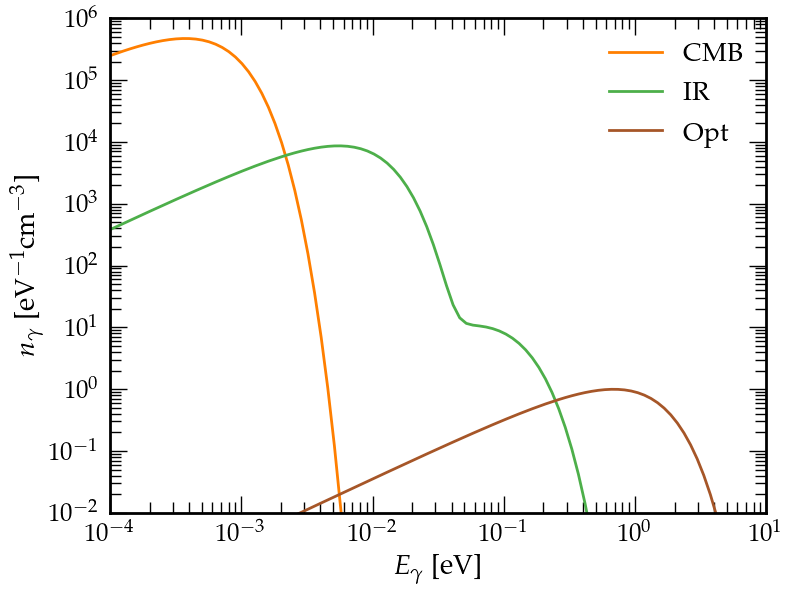

In [372]:
EgRange = np.logspace(-4, 6, 200)

fig = plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$E_\gamma$ [eV]', fontsize=20)
plt.ylabel(r'$n_\gamma$ [eV$^{-1}$cm$^{-3}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(1e-4, 1e1)
plt.ylim(1e-2, 1e6)

plt.plot(EgRange, nCMB(EgRange*1e-9)*1e-9, color=colours[1], lw=2, label=r'CMB')
plt.plot(EgRange, (nIRc(EgRange*1e-9, 5, 0)+nIRw(EgRange*1e-9, 5, 0))*1e-9, color=colours[2], lw=2, label=r'IR')
plt.plot(EgRange, nOpt(EgRange*1e-9, 5, 0)*1e-9, color=colours[4], lw=2, label=r'Opt')

plt.legend(loc='upper right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

In [332]:
def PIC(Eg, Ee, nISRF, *args): # GeV s^-1 GeV^-1

    gamma = Ee / me
    epsilon = Eg / Ee

    def integrand_log(lq, Eg, nISRF, *args):
        q = 10**lq
        Eg0 = Eg / (4 * gamma**2 * (1 - epsilon) * q)

        kernel = (2*q*np.log(q) + q + 1 - 2*q**2 + (epsilon**2 * (1 - q)) / (2 * (1-epsilon))) / q

        return (Eg - Eg0) * nISRF(Eg0, *args) * kernel * (epsilon < 1.0)

    Nlq = 200
    lqmin = np.log10(1/(4*gamma**2))
    lqmax = np.log10(1)

    lqs = np.linspace(lqmin, lqmax, Nlq)
    dlq = (lqmax - lqmin) / Nlq

    prefactor = GeVinsec/GeVincm * 3*sigmaT / (4*gamma**2)

    PIC = 0.0
    for lq in lqs:
        jac = 10**lq * dlq * np.log(10)
        PIC += prefactor * integrand_log(lq, Eg, nISRF, *args) * jac

    return PIC

/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3753055852.py:2: RuntimeWarning: overflow encountered in exp
  return GeVincm**3 / np.pi**2 * Eg**2 / (np.exp(Eg/T)-1)
/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3860662457.py:8: RuntimeWarning: divide by zero encountered in divide
  Eg0 = Eg / (4 * gamma**2 * (1 - epsilon) * q)
/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3860662457.py:10: RuntimeWarning: divide by zero encountered in divide
  kernel = (2*q*np.log(q) + q + 1 - 2*q**2 + (epsilon**2 * (1 - q)) / (2 * (1-epsilon))) / q
/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3753055852.py:2: RuntimeWarning: invalid value encountered in divide
  return GeVincm**3 / np.pi**2 * Eg**2 / (np.exp(Eg/T)-1)
/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3860662457.py:10: RuntimeWarning: invalid value encountered in divide
  kernel = (2*q*np.log(q) + q + 1 - 2*q**2 + (epsilon**2 * (1 - q)) / (2 * (1

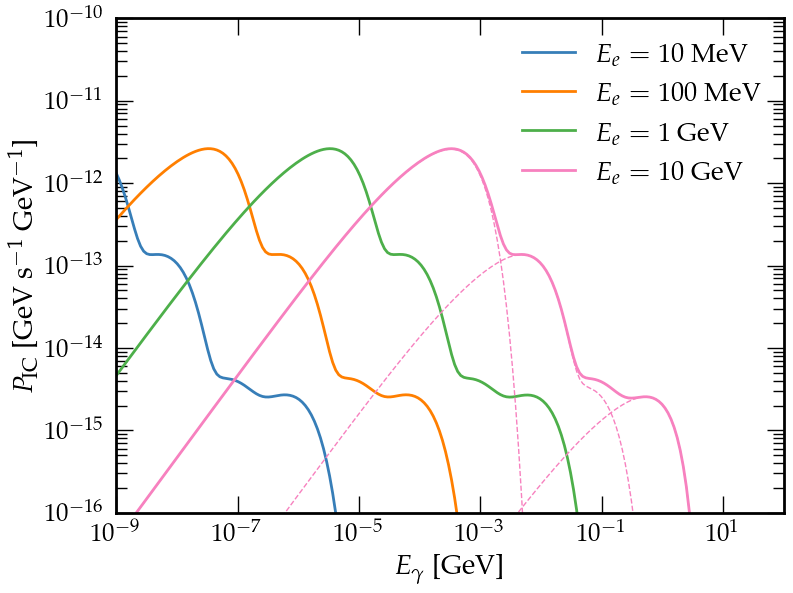

In [377]:
EgRange = np.logspace(-9, 1, 200)

fig = plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$E_\gamma$ [GeV]', fontsize=20)
plt.ylabel(r'$P_{\rm IC}$ [GeV s$^{-1}$ GeV$^{-1}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(1e-9, 1e2)
plt.ylim(1e-16, 1e-10)

plt.plot(EgRange, PIC(EgRange, 1e-2, nCMB)+PIC(EgRange, 1e-2, nIRw, rSun, 0)+PIC(EgRange, 1e-2, nIRc, rSun, 0)+PIC(EgRange, 1e-2, nOpt, rSun, 0), color=colours[0], lw=2, label=r'$E_e=10$ MeV')
plt.plot(EgRange, PIC(EgRange, 1e-1, nCMB)+PIC(EgRange, 1e-1, nIRw, rSun, 0)+PIC(EgRange, 1e-1, nIRc, rSun, 0)+PIC(EgRange, 1e-1, nOpt, rSun, 0), color=colours[1], lw=2, label=r'$E_e=100$ MeV')
plt.plot(EgRange, PIC(EgRange, 1e-0, nCMB)+PIC(EgRange, 1e-0, nIRw, rSun, 0)+PIC(EgRange, 1e-0, nIRc, rSun, 0)+PIC(EgRange, 1e-0, nOpt, rSun, 0), color=colours[2], lw=2, label=r'$E_e=1$ GeV')
plt.plot(EgRange, PIC(EgRange, 1e+1, nCMB)+PIC(EgRange, 1e+1, nIRw, rSun, 0)+PIC(EgRange, 1e+1, nIRc, rSun, 0)+PIC(EgRange, 1e+1, nOpt, rSun, 0), color=colours[3], lw=2, label=r'$E_e=10$ GeV')
plt.plot(EgRange, PIC(EgRange, 1e+1, nCMB),                                            color=colours[3], lw=1, ls='--')
plt.plot(EgRange, PIC(EgRange, 1e+1, nIRw, rSun, 0)+PIC(EgRange, 1e+1, nIRc, rSun, 0), color=colours[3], lw=1, ls='--')
plt.plot(EgRange, PIC(EgRange, 1e+1, nOpt, rSun, 0),                                   color=colours[3], lw=1, ls='--')

plt.legend(loc='upper right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

In [334]:
def BUni(B0):
    return B0 

def BGal(R, z, B0, R0, z0):
    return B0 * np.exp(-(R-rSun)/R0) * np.exp(-np.abs(z)/z0)

def BMF1(R, z):
    return BGal(R, z, 4.78e-6, 10., 2)

def BMF2(R, z):
    return BGal(R, z, 5.10e-6, 8.5, 1)

def BMF3(R, z):
    return BGal(R, z, 9.50e-6, 30., 4)

In [335]:
from scipy.special import kv

def PSyn(nu, Ee, B, *args): # GeV s^-1 Hz^-1

    gamma = Ee/me
    nuc = GeVinsec * 3/(2*np.pi) * gamma**2 * e * B(*args)*GaussinGeV2 / me
    y = nu/nuc

    prefactor = 2 * 3**.5 * e**3 * B(*args)*GaussinGeV2 / me / (4*np.pi)
    kernel = y**2 * (kv(4/3, y)*kv(1/3, y) - 3/5*y * (kv(4/3, y)**2 - kv(1/3, y)**2))

    return prefactor * kernel

3476515549.779094
3428231493.73396


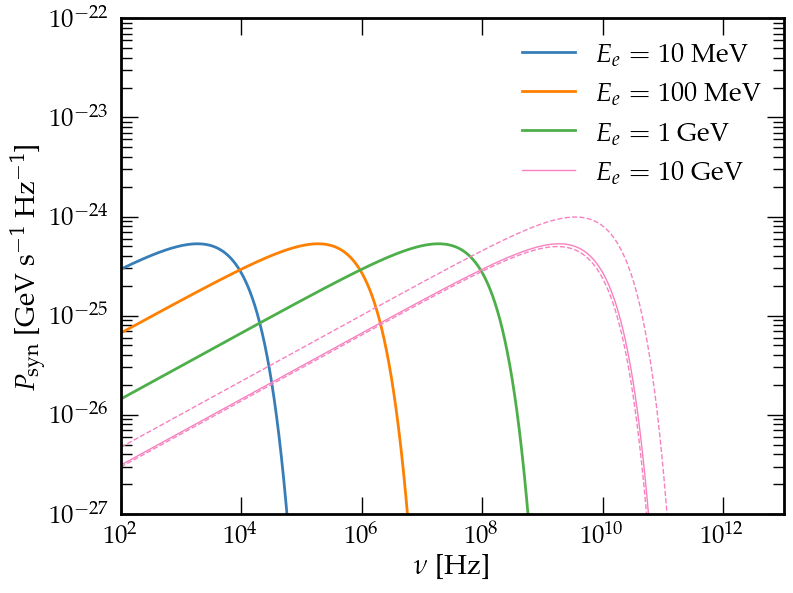

In [376]:
nuRange = np.logspace(2, 12, 500)

fig = plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\nu$ [Hz]', fontsize=20)
plt.ylabel(r'$P_{\rm syn}$ [GeV s$^{-1}$ Hz$^{-1}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(1e2, 1e13)
plt.ylim(1e-27, 1e-22)

plt.plot(nuRange, PSyn(nuRange, 1e-2, BMF2, rSun, 0), color=colours[0], lw=2, label=r'$E_e=10$ MeV')
plt.plot(nuRange, PSyn(nuRange, 1e-1, BMF2, rSun, 0), color=colours[1], lw=2, label=r'$E_e=100$ MeV')
plt.plot(nuRange, PSyn(nuRange, 1e-0, BMF2, rSun, 0), color=colours[2], lw=2, label=r'$E_e=1$ GeV')
plt.plot(nuRange, PSyn(nuRange, 1e+1, BMF2, rSun, 0), color=colours[3], lw=1, label=r'$E_e=10$ GeV')
plt.plot(nuRange, PSyn(nuRange, 1e+1, BMF1, rSun, 0), color=colours[3], lw=1, ls='--')
plt.plot(nuRange, PSyn(nuRange, 1e+1, BMF3, rSun, 0), color=colours[3], lw=1, ls='--')

print(0.114 * GeVinsec * 3/(2*np.pi) * (10/me)**2 * e * BMF3(rSun, 0)*GaussinGeV2 / me)
print(nuRange[np.argmax(PSyn(nuRange, 10,  BMF3, rSun, 0))])

plt.legend(loc='upper right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

In [337]:
def ngasGal(R, z, n0, R0, z0):
    return n0 * np.exp(-np.abs(z)/z0) * np.exp(-(R-rSun)/R0)

def nHI(R, z):
    return ngasGal(R, z, 0.5, 10, 0.2)

def nH2(R, z):
    return ngasGal(R, z, 0.15, 10, 0.05)

def nHII(R, z):
    return ngasGal(R, z, 0.03, 10, 1.0)

def nHe(R, z):
    return ngasGal(R, z, 0.1*(0.5+2*0.15+0.03), 10, 0.2)

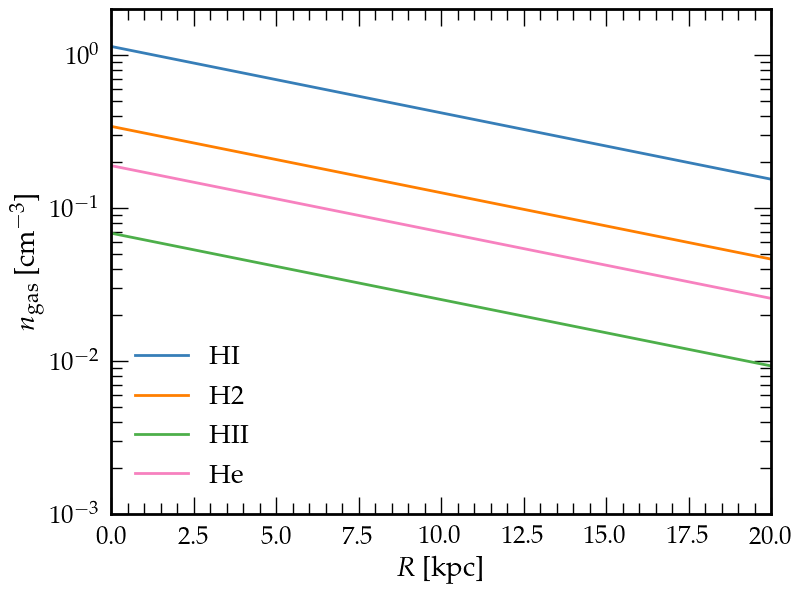

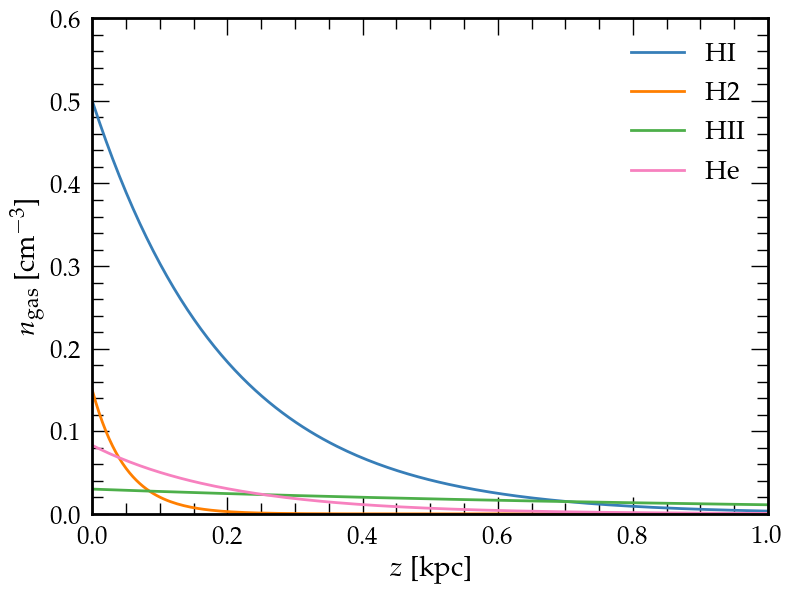

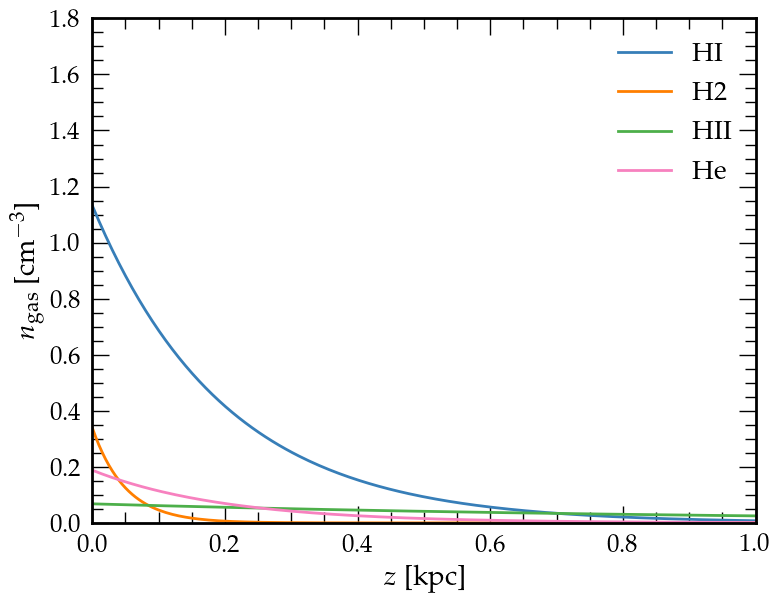

In [379]:
fig = plt.figure(figsize=(8,6))

plt.yscale('log')

plt.xlabel(r'$R$ [kpc]', fontsize=20)
plt.ylabel(r'$n_{\rm{gas}}$ [cm$^{-3}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(0, 20)
plt.ylim(1e-3, 2)

Rrange = np.linspace(0, 20, 200)

plt.plot(Rrange, [nHI (r, 0) for r in Rrange], color=colours[0], lw=2, label='HI')
plt.plot(Rrange, [nH2 (r, 0) for r in Rrange], color=colours[1], lw=2, label='H2')
plt.plot(Rrange, [nHII(r, 0) for r in Rrange], color=colours[2], lw=2, label='HII')
plt.plot(Rrange, [nHe (r, 0) for r in Rrange], color=colours[3], lw=2, label='He')

plt.legend(loc='lower left', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

fig = plt.figure(figsize=(8,6))

plt.xlabel(r'$z$ [kpc]', fontsize=20)
plt.ylabel(r'$n_{\rm{gas}}$ [cm$^{-3}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(0, 1.0)
plt.ylim(0, 0.6)

zrange = np.linspace(0, 1, 200)

plt.plot(zrange, nHI (rSun, zrange), color=colours[0], lw=2, label='HI')
plt.plot(zrange, nH2 (rSun, zrange), color=colours[1], lw=2, label='H2')
plt.plot(zrange, nHII(rSun, zrange), color=colours[2], lw=2, label='HII')
plt.plot(zrange, nHe (rSun, zrange), color=colours[3], lw=2, label='He')

plt.legend(loc='upper right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

fig = plt.figure(figsize=(8,6))

plt.xlabel(r'$z$ [kpc]', fontsize=20)
plt.ylabel(r'$n_{\rm{gas}}$ [cm$^{-3}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(0, 1.0)
plt.ylim(0, 1.8)

plt.plot(zrange, nHI (0.1, zrange), color=colours[0], lw=2, label='HI')
plt.plot(zrange, nH2 (0.1, zrange), color=colours[1], lw=2, label='H2')
plt.plot(zrange, nHII(0.1, zrange), color=colours[2], lw=2, label='HII')
plt.plot(zrange, nHe (0.1, zrange), color=colours[3], lw=2, label='He')

plt.legend(loc='upper right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()

In [339]:
def PBrems(Eg, Ee, ngas, *args):
    Eg = np.asarray(Eg)
    Ee = np.asarray(Ee)

    gamma = Ee/me
    epsilon = Eg/Ee

    def dsigmadEg(phi1, phi2):
        prefactor = 3*alpha*sigmaT / (8*np.pi*Eg)
        return prefactor * ((1 + (1-epsilon)**2) * phi1 - 2/3 * (1-epsilon) * phi2)
    
    def phiion(Z):
        return 4 * Z * (Z+1) * (np.log(2*gamma * (1/epsilon-1)) - 1/2)

    phi1HIss, phi2HIss = 45.79, 44.46
    phi1H2ss, phi2H2ss = 2*phi1HIss, 2*phi2HIss
    phi1Hess, phi2Hess = 134.6, 131.4

    #UR = gamma > 1e3
    #LR = gamma < 1e2

    if ngas == nHII:
        Pbrems = Eg * ngas(*args) * dsigmadEg(phiion(1), phiion(1))
        Pbrems *= GeVinsec/GeVincm
        return Pbrems
    if ngas == nHI:
        PbremsUR = Eg * ngas(*args) * dsigmadEg(phi1HIss, phi2HIss)
        PbremsLR = Eg * ngas(*args) * dsigmadEg(phiion(1), phiion(1))
    elif ngas == nH2: 
        PbremsUR = Eg * ngas(*args) * dsigmadEg(phi1H2ss, phi2H2ss)
        PbremsLR = Eg * ngas(*args) * dsigmadEg(phiion(2), phiion(2))
    elif ngas == nHe:
        PbremsUR = Eg * ngas(*args) * dsigmadEg(phi1Hess, phi2Hess)
        PbremsLR = Eg * ngas(*args) * dsigmadEg(phiion(2), phiion(2))   

    #Pbrems =  np.where(UR, PbremsUR, 0.0)
    #Pbrems += np.where(LR, PbremsLR, 0.0)

    logg = np.log10(gamma)
    t = (logg - 2.0) / (3.0 - 2.0)
    t = np.clip(t, 0.0, 1.0)
    Pbrems = (1 - t) * PbremsLR + t * PbremsUR

    Pbrems *= GeVinsec/GeVincm

    return Pbrems

/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3975613535.py:13: RuntimeWarning: invalid value encountered in log
  return 4 * Z * (Z+1) * (np.log(2*gamma * (1/epsilon-1)) - 1/2)


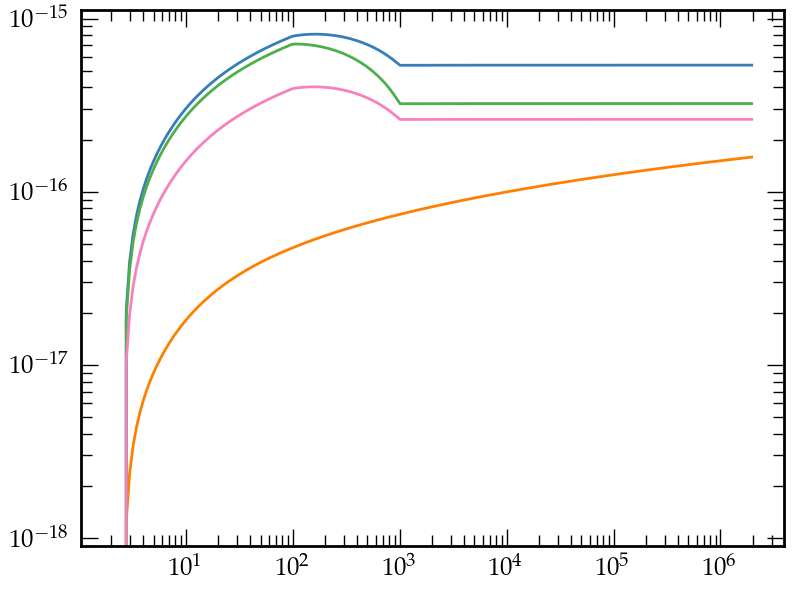

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

#plt.xlabel(r'$R$ [kpc]', fontsize=20)
#plt.ylabel(r'$n_{\rm{gas}}$ [cm$^{-3}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

#plt.xlim(0, 20)
#plt.ylim(1e-3, 2)

Eerange = np.logspace(np.log10(me), 3, 200)

plt.plot(Eerange/me, PBrems(1e-3, Eerange, nHI,  rSun, 0), color=colours[0], lw=2)
plt.plot(Eerange/me, PBrems(1e-3, Eerange, nHII, rSun, 0), color=colours[1], lw=2)
plt.plot(Eerange/me, PBrems(1e-3, Eerange, nH2,  rSun, 0), color=colours[2], lw=2)
plt.plot(Eerange/me, PBrems(1e-3, Eerange, nHe,  rSun, 0), color=colours[3], lw=2)

fig.tight_layout(pad=0.5)
plt.show()

In [363]:
def bIC(Ee, R, z):

    def integrand_log(lEg, Ee, R, z):
        Eg = 10**lEg
        return PIC(Eg, Ee, nCMB)+PIC(Eg, Ee, nIRc, R, z)+PIC(Eg, Ee, nIRw, R, z)+PIC(Eg, Ee, nOpt, R, z)

    NlEg = 200
    lEgmin = np.log10(1e-10)
    lEgmax = np.log10(Ee-1e-10)

    lEgs = np.linspace(lEgmin, lEgmax, NlEg)
    dlEg = (lEgmax - lEgmin) / NlEg

    bIC = 0.0
    for lEg in lEgs:
        jac = 10**lEg * dlEg * np.log(10)
        bIC += integrand_log(lEg, Ee, R, z) * jac

    return bIC

def bSyn(Ee, B, R, z):

    def integrand_log(lnu, Ee, B, *args):
        nu = 10**lnu
        return PSyn(nu, Ee, B, *args)
    
    numax = 100 * GeVinsec * 3/(2*np.pi) * (Ee/me)**2 * e * B(R, z)*GaussinGeV2 / me

    Nlnu = 200
    lnumin = np.log10(1e-10)
    lnumax = np.log10(numax)

    lnus = np.linspace(lnumin, lnumax, Nlnu)
    dlnu = (lnumax - lnumin) / Nlnu

    bSyn = 0.0
    for lnu in lnus:
        jac = 10**lnu * dlnu * np.log(10)
        bSyn += integrand_log(lnu, Ee, B, R, z) * jac

    return bSyn

def bBrems(Ee, R, z):

    def integrand_log(lEg, Ee, R, z):
        Eg = 10**lEg
        return PBrems(Eg, Ee, nHI, R, z)+PBrems(Eg, Ee, nHII, R, z)+PBrems(Eg, Ee, nH2, R, z)+PBrems(Eg, Ee, nHe, R, z)

    NlEg = 200
    lEgmin = np.log10(1e-10)
    lEgmax = np.log10(Ee-1e-10)

    lEgs = np.linspace(lEgmin, lEgmax, NlEg)
    dlEg = (lEgmax - lEgmin) / NlEg

    bBrems = 0.0
    for lEg in lEgs:
        jac = 10**lEg * dlEg * np.log(10)
        bBrems += integrand_log(lEg, Ee, R, z) * jac

    return bBrems

def bIon(Ee, R, z):

    gamma = Ee/me

    prefactor = 9*sigmaT/4 * me

    bIon  = nHI(R, z) * (np.log(gamma) + 2/3 * np.log(me/15.0e-9))
    bIon  = nH2(R, z) * (np.log(gamma) + 2/3 * np.log(me/15.0e-9)) * 2
    bIon += nHe(R, z) * (np.log(gamma) + 2/3 * np.log(me/41.5e-9)) * 2
    bIon *= prefactor
    bIon *= GeVinsec/GeVincm   

    return bIon

def bCoul(Ee, R, z):

    gamma = Ee/me

    prefactor = 3*sigmaT/4 * me

    Eplasma = e * np.sqrt(nHII(R, z)/GeVincm**3 / me)

    bCoul = nHII(R, z) * (np.log(gamma) + 2 * np.log(me/Eplasma))
    bCoul *= prefactor
    bCoul *= GeVinsec/GeVincm

    return bCoul

def bTot(Ee, R, z):
    return bCoul(Ee, R, z) + bIon(Ee, R, z) + bIC(Ee, R, z) + bSyn(Ee, BMF2, R, z) + bBrems(Ee, R, z)

/var/folders/m5/ptmv1tqj29v601gqzb56cpx80000gn/T/ipykernel_68740/3753055852.py:2: RuntimeWarning: overflow encountered in exp
  return GeVincm**3 / np.pi**2 * Eg**2 / (np.exp(Eg/T)-1)


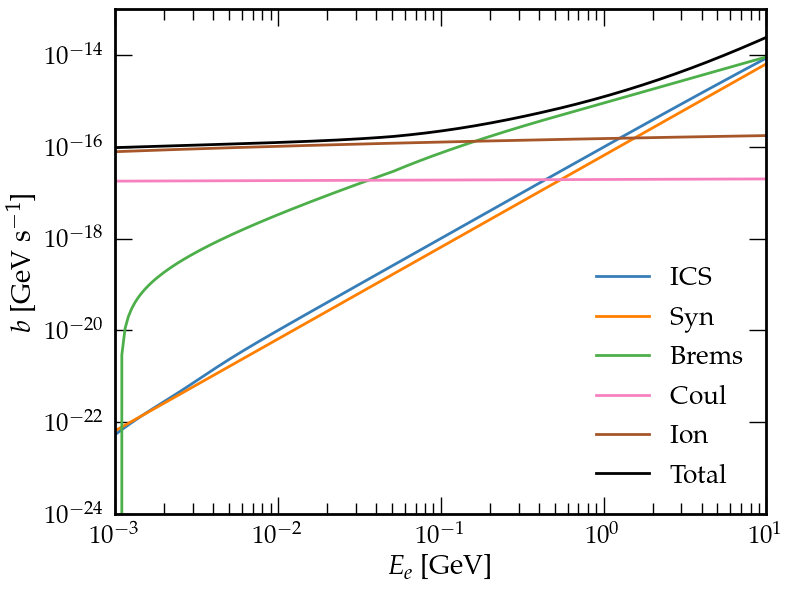

In [368]:
fig = plt.figure(figsize=(8,6))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$E_e$ [GeV]', fontsize=20)
plt.ylabel(r'$b$ [GeV s$^{-1}$]', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.minorticks_on()
plt.tick_params(which='major',direction='in',width=1,length=12,pad=8)
plt.tick_params(which='minor',direction='in',width=1,length=8)

plt.xlim(1e-3, 1e1)
plt.ylim(1e-24, 1e-13)

Eerange = np.logspace(-3, 1, 200)

plt.plot(Eerange, bIC   (Eerange,       rSun, 0), color=colours[0], lw=2, label='ICS')
plt.plot(Eerange, bSyn  (Eerange, BMF2, rSun, 0), color=colours[1], lw=2, label='Syn')
plt.plot(Eerange, bBrems(Eerange,       rSun, 0), color=colours[2], lw=2, label='Brems')
plt.plot(Eerange, bCoul (Eerange,       rSun, 0), color=colours[3], lw=2, label='Coul')
plt.plot(Eerange, bIon  (Eerange,       rSun, 0), color=colours[4], lw=2, label='Ion')
plt.plot(Eerange, bTot  (Eerange,       rSun, 0), color='k', lw=2, label='Total')

plt.legend(loc='lower right', frameon=False)
fig.tight_layout(pad=0.5)
plt.show()